In [255]:
import pandas as pd
import pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()
from string import ascii_uppercase



In [256]:
KEYWORDS = ['Fast Fashion', 'Sustainable Fashion', 'Missguided', 'Greenwashing']
KEYWORDS_CODES = [pytrend.suggestions(keyword=i)[0] for i in KEYWORDS]
df_CODES = pd.DataFrame(KEYWORDS_CODES)
df_CODES

,mid,title,type
0,/m/04y5l_6,Fast fashion,Topic
1,/m/02x01t8,Sustainable fashion,Topic
2,/g/11c3ywbhfg,Missguided,Topic
3,/m/01w1qb,Greenwashing,Topic


In [257]:
EXACT_KEYWORDS=df_CODES['mid'].to_list()
DATE_INTERVAL='2017-01-01 2021-01-01'
COUNTRY=['GB'] #Use this link for iso country code
CATEGORY=185 # Use this link to select categories
SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)

In [272]:
Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
dicti = {}
i = 1
for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
        pytrend.build_payload(kw_list=keyword,
                              timeframe = DATE_INTERVAL,
                              geo = Country,
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE)
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)
df_trends

#df_trends.to_csv('data/google_trends.csv', encoding='utf-8')

1                    2                       3            \
           /m/04y5l_6 isPartial /m/02x01t8 isPartial /g/11c3ywbhfg isPartial   
date                                                                           
2017-01-01         17     False          0     False            22     False   
2017-01-08         47     False         23     False            43     False   
2017-01-15         32     False         23     False            54     False   
2017-01-22          0     False         23     False            43     False   
2017-01-29         16     False         23     False            53     False   
...               ...       ...        ...       ...           ...       ...   
2020-11-29        100     False         39     False            18     False   
2020-12-06         58     False         84     False             9     False   
2020-12-13         59     False         72     False            27     False   
2020-12-20          0     False         22     False            10     False   
2020-12-27          0     False         33     False             9     False   

                   4            
           /m/01w1qb isPartial  
date                            
2017-01-01         0     False  
2017-01-08         0     False  
2017-01-15         0     False  
2017-01-22         0     False  
2017-01-29         0     False  
...              ...       ...  
2020-11-29         0     False  
2020-12-06         0     False  
2020-12-13         0     False  
2020-12-20         0     False  
2020-12-27         0     False  

[209 rows x 8 columns]

In [273]:
df_trends.columns = df_trends.columns.droplevel() #drop outside header
df_trends = df_trends.drop('isPartial', 1) #drop "isPartial"
df_trends.reset_index(level=0,inplace=True) #reset_index
df_trends.columns=['date','Fast Fashion-UK', 'Sustainable Fashion-UK','Missguided-UK', 'Greenwashing-UK'] #change column names
df_trends.columns
print(df_trends.columns.shape)
print(df_trends.describe())

(5,)
       Fast Fashion-UK  Sustainable Fashion-UK  Missguided-UK  Greenwashing-UK
count       209.000000              209.000000     209.000000       209.000000
mean         29.229665               35.655502      30.229665         2.143541
std          23.704204               19.930311      21.602058        11.911471
min           0.000000                0.000000       0.000000         0.000000
25%          12.000000               22.000000      11.000000         0.000000
50%          30.000000               35.000000      25.000000         0.000000
75%          46.000000               48.000000      44.000000         0.000000
max         100.000000              100.000000     100.000000       100.000000


C:\Users\LMuka\AppData\Local\Temp\ipykernel_32000\2069173509.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_trends = df_trends.drop('isPartial', 1) #drop "isPartial"


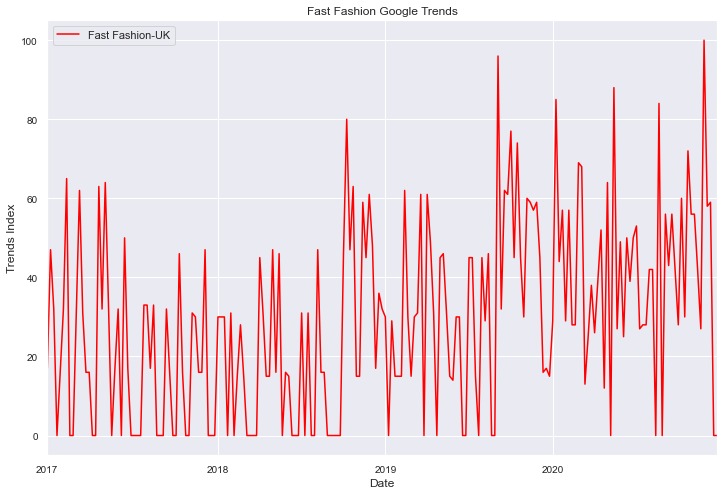

In [263]:
import seaborn as sns
#Graph 1
sns.set(color_codes=True)
dx = df_trends.plot(figsize = (12,8),x="date", y=['Fast Fashion-UK'], kind="line", title = "Fast Fashion Google Trends", color = 'red')
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)


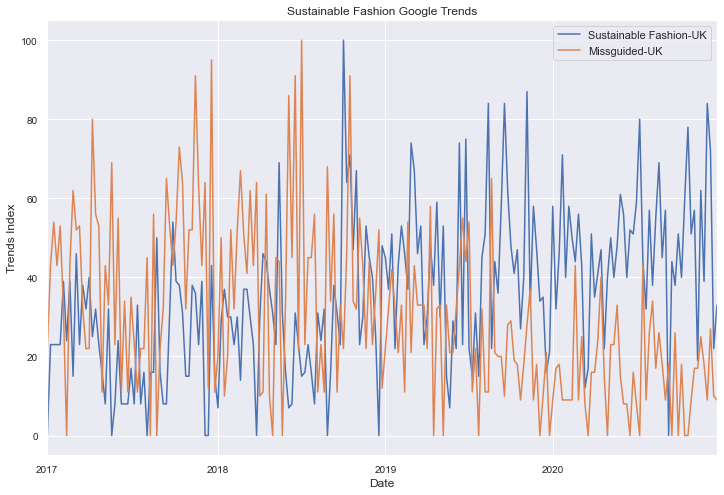

In [275]:
dx = df_trends.plot(figsize = (12,8),x="date", y=['Sustainable Fashion-UK','Missguided-UK'], kind="line", title = "Sustainable Fashion Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)

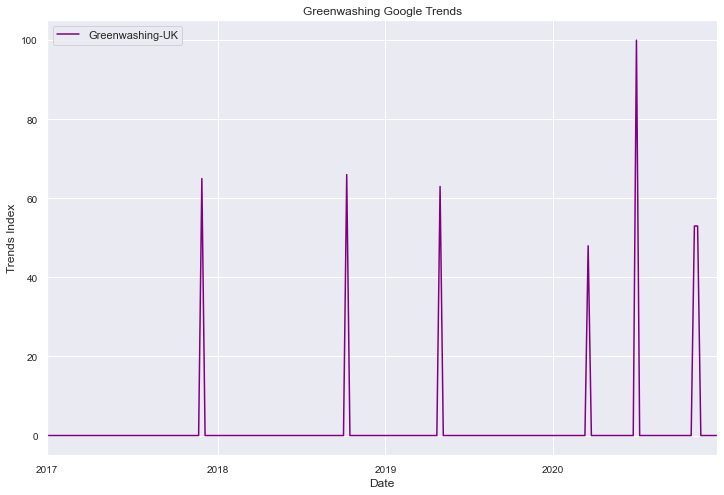

In [264]:
dx = df_trends.plot(figsize = (12,8),x="date", y=['Greenwashing-UK'], kind="line", title = "Greenwashing Google Trends", color = 'purple')
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)

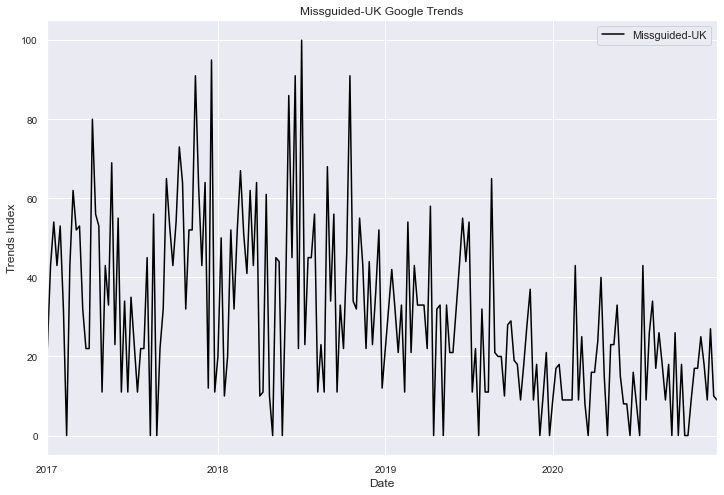

In [265]:
dx = df_trends.plot(figsize = (12,8),x="date", y=['Missguided-UK'], kind="line", title = "Missguided-UK Google Trends", color = 'black')
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)